In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
print(f'X shape: {X_train.shape}')
print(X_train)
print(f'X shape: {y_train.shape}')
print(y_train)

X shape: (3, 4)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
X shape: (3,)
[460 232 178]


In [4]:
# we initialize them with some selected optimal values
# the dimension of w will be n, for the number of features in each example xi
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [5]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = (cost / (2 * m))  # we use 1/2m instead of 1/m to average, as it helps us when taking the derivative of the loss

    return total_cost

In [6]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal parameters: {cost}')

Cost at optimal parameters: 1.5578904330213735e-12


In [7]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        err = (np.dot(w, X[i]) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [8]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)

In [30]:
def gradient_descent(X, y, w_in, b_in, lr, num_iters, cost_function, gradient_function):
    J = []  # to store history of costs
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)

        w = w - lr * dj_dw
        b = b - lr * dj_db

        J.append(cost_function(X, y, w, b))

        if i % 1000 == 0:
            print(f'Cost on iteration {i}: {J[-1]:.2f}')

    return w, b, J

In [61]:
initial_w = np.zeros_like(w_init)
initial_b = 0

iterations = 10000
lr = 5.0e-7

w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, lr, iterations, compute_cost, compute_gradient)
print(f'after gradient descent:')
print(f'w: {w_final}, b: {b_final:.2f}')

Cost on iteration 0: 2161.10
Cost on iteration 1000: 1432.21
Cost on iteration 2000: 1372.78
Cost on iteration 3000: 1348.92
Cost on iteration 4000: 1339.31
Cost on iteration 5000: 1335.43
Cost on iteration 6000: 1333.83
Cost on iteration 7000: 1333.16
Cost on iteration 8000: 1332.86
Cost on iteration 9000: 1332.70
after gradient descent:
w: [ 0.27010392 -0.00745166 -0.03743893 -0.72220612], b: 0.04


In [11]:
# custom function to load data from a dataset in the course files
def load_house_data():
    data = np.loadtxt("houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [12]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

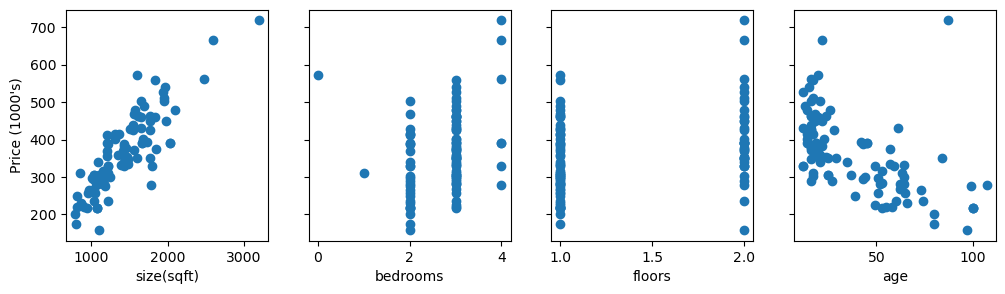

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
# fig refers to the entire figure, and ax is an array of subplots
# 1, 4 --> subplots in one row and four columns
# sharey=True --> subplots share the same y-axis

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [14]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)  # mu.shape = (n) --> features
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [15]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

In [17]:
# gradient descent with normalized data
lr = 1.0e-1
iterations = 1000
initial_w = np.zeros_like(w_init)
initial_b = 0

w_norm, b_norm, hist = gradient_descent(X_norm, y_train, initial_w, initial_b, lr, iterations, compute_cost, compute_gradient)

Cost on iteration 1: 57617.03
Cost on iteration 101: 221.09
Cost on iteration 201: 219.21
Cost on iteration 301: 219.21
Cost on iteration 401: 219.21
Cost on iteration 501: 219.21
Cost on iteration 601: 219.21
Cost on iteration 701: 219.21
Cost on iteration 801: 219.21
Cost on iteration 901: 219.21


In [18]:
# finally using the model for prediction on new data
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${x_house_predict*1000:0.0f}")

[-0.53052829  0.43380884 -0.78927234  0.06269567]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709


### Polynomial Regression

In [22]:
def run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b, alpha, iterations, compute_cost, compute_gradient)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)

Cost on iteration 1: 7329.22
Cost on iteration 101: 0.23
Cost on iteration 201: 0.23
Cost on iteration 301: 0.23
Cost on iteration 401: 0.23
Cost on iteration 501: 0.23
Cost on iteration 601: 0.23
Cost on iteration 701: 0.23
Cost on iteration 801: 0.23
Cost on iteration 901: 0.23
w,b found by gradient descent: w: [1.00435057], b: 0.0090


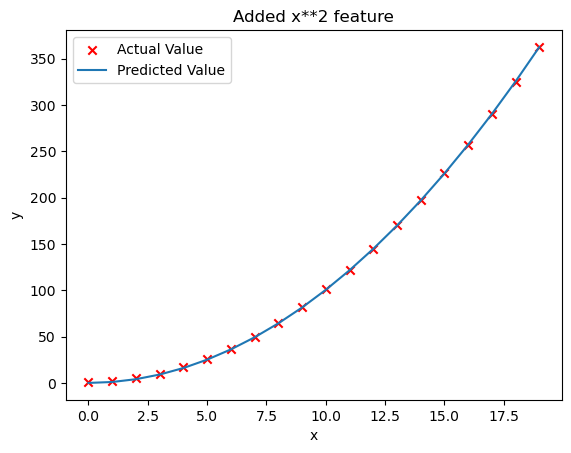

In [24]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x**2
X = X.reshape(-1, 1)  # to convert it to a 2D matrix of 20 rows each with 1 column

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value") 
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X, model_w) + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [25]:
# trying out multiple features

Cost on iteration 0: 1140.29
Cost on iteration 1000: 328.54
Cost on iteration 2000: 280.44
Cost on iteration 3000: 239.39
Cost on iteration 4000: 204.34
Cost on iteration 5000: 174.43
Cost on iteration 6000: 148.90
Cost on iteration 7000: 127.10
Cost on iteration 8000: 108.49
Cost on iteration 9000: 92.61
w,b found by gradient descent: w: [0.08237526 0.53552137 0.02752216], b: 0.0106


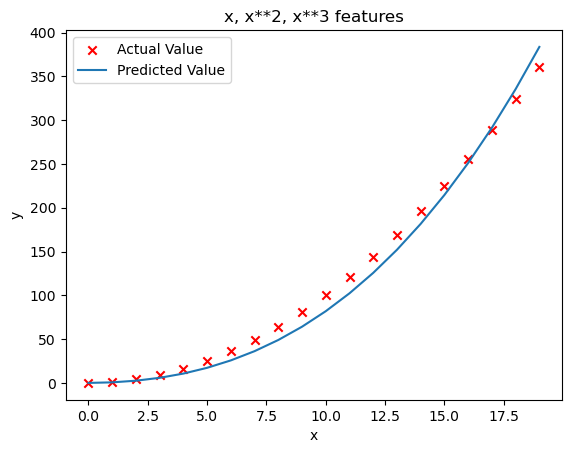

In [31]:
y = x**2
X = np.c_[x, x**2, x**3]  
# np.c_ --> column_stack function, stacks 1-D arrays as columns into a 2-D array

model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value") 
plt.title("x, x**2, x**3 features")
plt.plot(x, np.dot(X, model_w) + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [32]:
# so over here, x and x**3 have less value, and can be removed

Cost on iteration 0: 9421.47
Cost on iteration 1000: 4.22
Cost on iteration 2000: 3.24
Cost on iteration 3000: 2.49
Cost on iteration 4000: 1.91
Cost on iteration 5000: 1.46
Cost on iteration 6000: 1.12
Cost on iteration 7000: 0.86
Cost on iteration 8000: 0.66
Cost on iteration 9000: 0.51
w,b found by gradient descent: w: [ 7.67449373 93.94625791 12.28868959], b: 123.5000


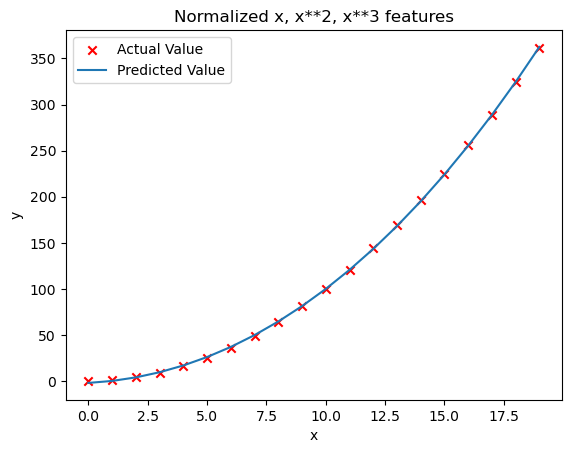

In [35]:
# using normalization with multiple features scales

y = x**2
X = np.c_[x, x**2, x**3] 
X, X_mu, X_sigma = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value") 
plt.title("Normalized x, x**2, x**3 features")
plt.plot(x, np.dot(X, model_w) + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Scikit-Learn

In [44]:
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [39]:
scaler = StandardScaler()  # to do the z-score normalization
X_norm = scaler.fit_transform(X_train)

In [51]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)

# After fitting model
print(f"Model coefficients: {sgdr.coef_}")
print(f"Model intercept: {sgdr.intercept_}")
print(f"Number of iterations completed: {sgdr.n_iter_}")

SGDRegressor()
Model coefficients: [110.18079657 -21.10433949 -32.54043773 -38.02281672]
Model intercept: [363.16801123]
Number of iterations completed: 127


In [54]:
w_norm = sgdr.coef_
b_norm = sgdr.intercept_
print(f'model parameters:')
print(f'w: {w_norm} \nb = {b_norm}')

model parameters:
w: [110.18079657 -21.10433949 -32.54043773 -38.02281672] 
b = [363.16801123]


In [59]:
# predict data using trained model

# using predict() function
y_pred_sgd = sgdr.predict(X_norm)
# manually calculating using w and b
y_pred = np.dot(X_norm, w_norm) + b_norm

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"\nPrediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True

Prediction on training set:
[295.23559035 485.82795625 389.52782308 491.99013676]
Target values 
[300.  509.8 394.  540. ]
